In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                           roc_auc_score, roc_curve, precision_recall_curve,
                           accuracy_score, precision_score, recall_score, f1_score)
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('ggplot')  # Alternative: 'seaborn', 'fivethirtyeight', 'classic'
sns.set_palette("husl")

In [2]:
# Step 2: Load and Explore the Data
# Load the dataset
df = pd.read_csv('Loan_default.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nBasic Statistics:")
display(df.describe())

Dataset Shape: (255347, 18)

First 5 rows:


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [3]:
# Step 3: Check for Missing Values and Data Quality
print("Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

print("\nDuplicate rows:", df.duplicated().sum())

# Check the target variable distribution
print("\nTarget Variable Distribution (Default):")
target_dist = df['Default'].value_counts()
print(target_dist)
print("\nDefault Rate: {:.2f}%".format(target_dist[1] / len(df) * 100))

Missing Values:
Series([], dtype: int64)

Duplicate rows: 0

Target Variable Distribution (Default):
Default
0    225694
1     29653
Name: count, dtype: int64

Default Rate: 11.61%


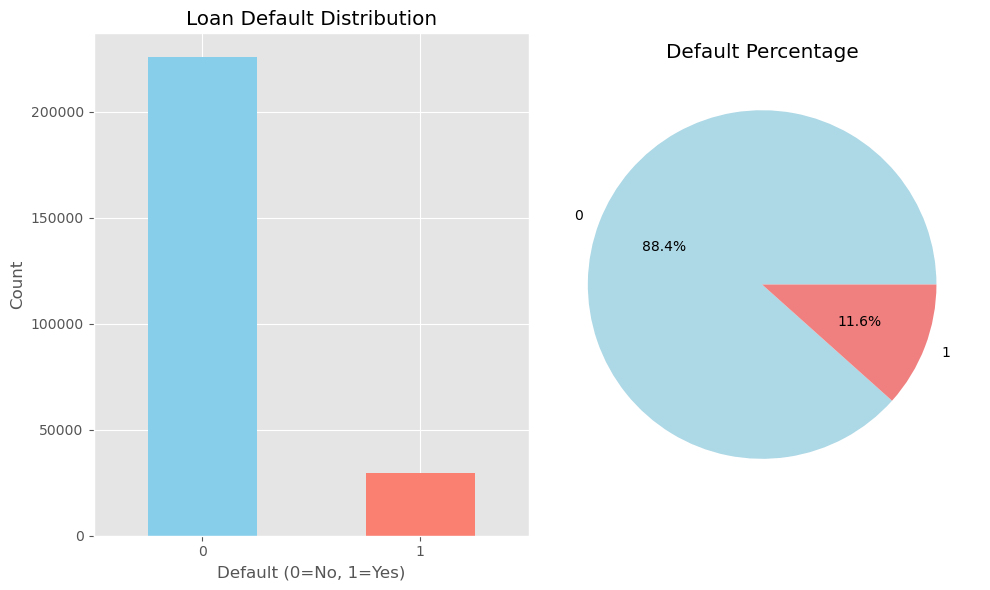

In [4]:
# Step 4: Exploratory Data Analysis (EDA)

# 4.1 Target Variable Visualization
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df['Default'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Loan Default Distribution')
plt.xlabel('Default (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['Default'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Default Percentage')
plt.ylabel('')
plt.tight_layout()
plt.show()

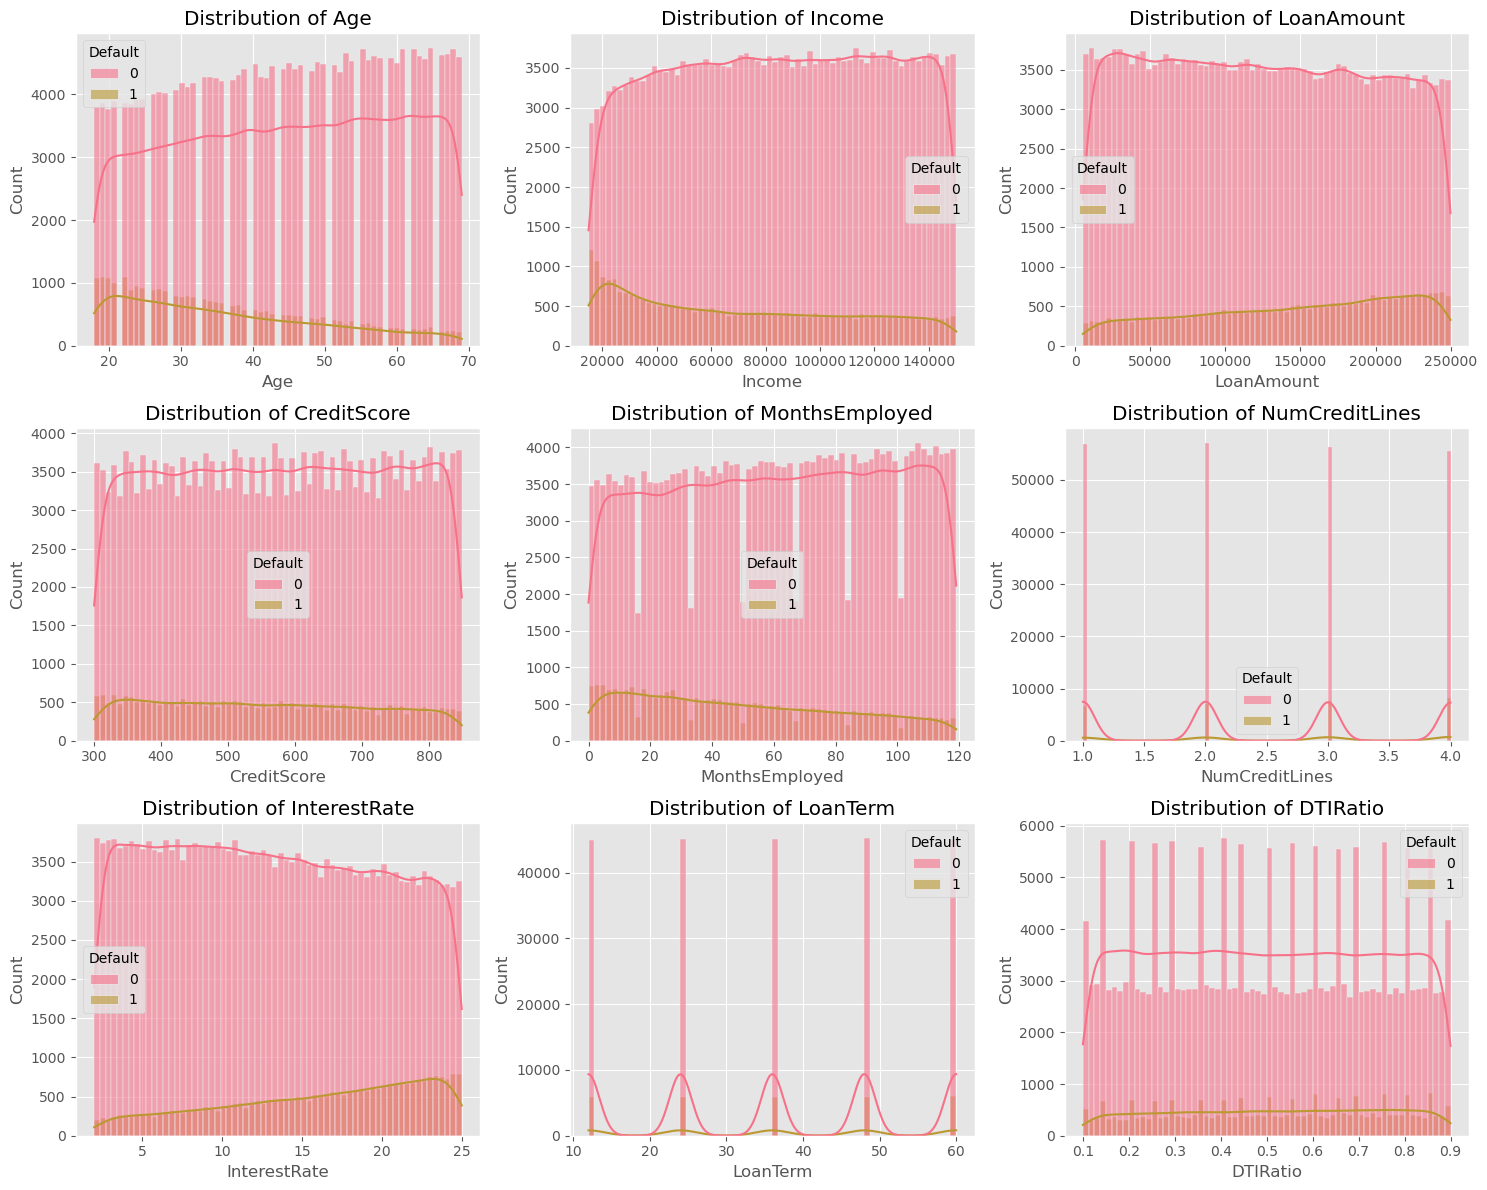

In [5]:
# 4.2 Numerical Features Analysis
numerical_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                     'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=feature, hue='Default', kde=True, alpha=0.6)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

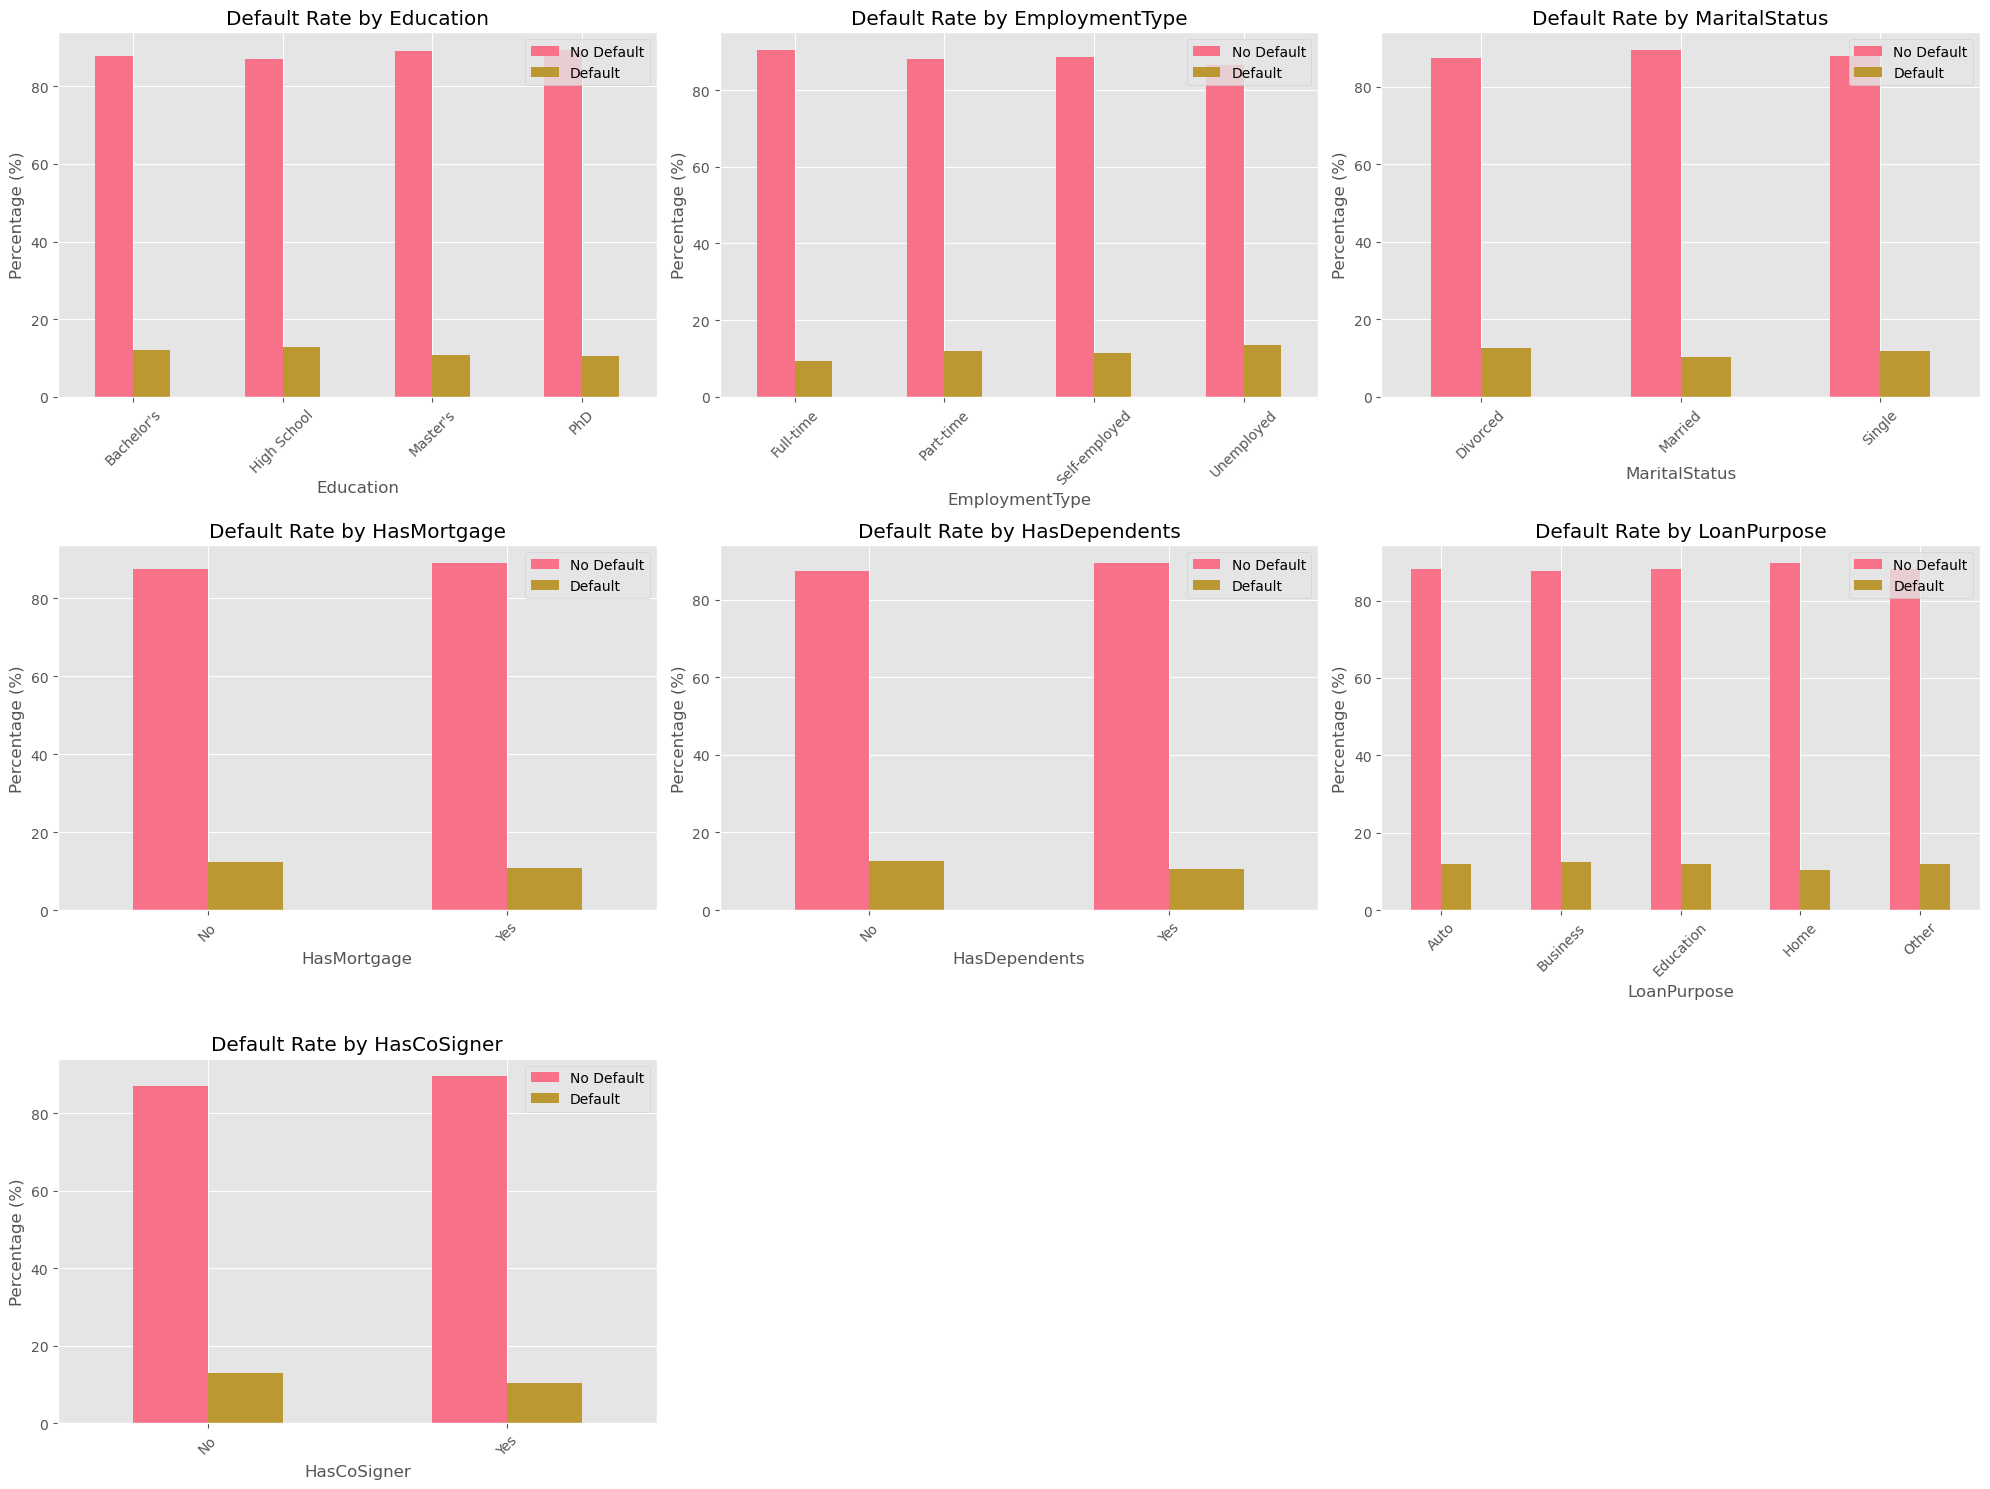

In [6]:
# 4.3 Categorical Features Analysis
categorical_features = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 
                       'HasDependents', 'LoanPurpose', 'HasCoSigner']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    # Calculate percentage of defaults for each category
    cross_tab = pd.crosstab(df[feature], df['Default'], normalize='index') * 100
    cross_tab.plot(kind='bar', ax=plt.gca())
    plt.title(f'Default Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Percentage (%)')
    plt.legend(['No Default', 'Default'])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

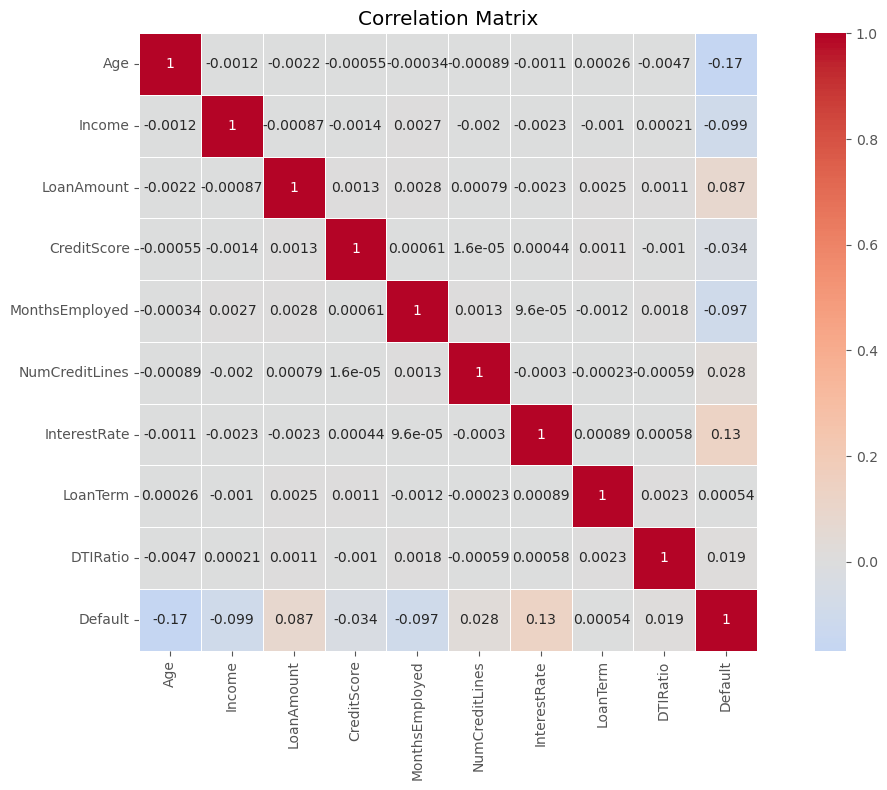

In [7]:
# 4.4 Correlation Matrix
plt.figure(figsize=(12, 8))
# Select only numerical features for correlation
numerical_df = df[numerical_features + ['Default']]
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [8]:
# Step 5: Data Preprocessing

# 5.1 Handle categorical variables
print("Original categorical features:")
for feature in categorical_features:
    print(f"{feature}: {df[feature].unique()}")

# Encode categorical variables
label_encoders = {}
df_encoded = df.copy()

for feature in categorical_features:
    le = LabelEncoder()
    df_encoded[feature] = le.fit_transform(df[feature].astype(str))
    label_encoders[feature] = le

print("\nAfter encoding:")
display(df_encoded[categorical_features].head())

Original categorical features:
Education: ["Bachelor's" "Master's" 'High School' 'PhD']
EmploymentType: ['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
MaritalStatus: ['Divorced' 'Married' 'Single']
HasMortgage: ['Yes' 'No']
HasDependents: ['Yes' 'No']
LoanPurpose: ['Other' 'Auto' 'Business' 'Home' 'Education']
HasCoSigner: ['Yes' 'No']

After encoding:


,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,0,0,0,1,1,4,1
1,2,0,1,0,0,4,1
2,2,3,0,1,1,0,0
3,1,0,1,0,0,1,0
4,0,3,0,0,1,0,0


In [9]:
# 5.2 Prepare features and target
X = df_encoded.drop('Default', axis=1)
y = df_encoded['Default']

# Remove LoanID if it exists
if 'LoanID' in X.columns:
    X = X.drop('LoanID', axis=1)

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (255347, 16)
Target shape: (255347,)


In [10]:
# 5.3 Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("\nTraining set default rate: {:.2f}%".format(y_train.mean() * 100))
print("Test set default rate: {:.2f}%".format(y_test.mean() * 100))

Training set size: (204277, 16)
Test set size: (51070, 16)

Training set default rate: 11.61%
Test set default rate: 11.61%


In [11]:
# Step 6: Handle Class Imbalance (if needed)
default_rate = y_train.mean()
print(f"Training set default rate: {default_rate:.2%}")

if default_rate < 0.3:  # If default rate is less than 30%, consider balancing
    print("Applying SMOTE for class balancing...")
    from imblearn.over_sampling import SMOTE
    
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
    
    print("After balancing:")
    print("Training set size:", X_train_balanced.shape)
    print("Default distribution:", pd.Series(y_train_balanced).value_counts())
    
    # Use balanced data for training
    X_train_final, y_train_final = X_train_balanced, y_train_balanced
else:
    print("No balancing needed - using original training data")
    X_train_final, y_train_final = X_train, y_train

Training set default rate: 11.61%
Applying SMOTE for class balancing...
After balancing:
Training set size: (361110, 16)
Default distribution: Default
0    180555
1    180555
Name: count, dtype: int64


In [12]:
# Step 7: Model Building - Decision Tree

# 7.1 Base Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_final, y_train_final)

# Predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluation
print("=== Decision Tree (Base) ===")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_dt)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_dt)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_dt)))
print("F1-Score: {:.4f}".format(f1_score(y_test, y_pred_dt)))
print("ROC-AUC: {:.4f}".format(roc_auc_score(y_test, y_pred_proba_dt)))

=== Decision Tree (Base) ===
Accuracy: 0.7474
Precision: 0.1792
Recall: 0.3281
F1-Score: 0.2318
ROC-AUC: 0.5653


In [13]:
# 7.2 Hyperparameter Tuning for Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

dt_grid.fit(X_train_final, y_train_final)

print("Best parameters for Decision Tree:")
print(dt_grid.best_params_)

# Best model
best_dt = dt_grid.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)
y_pred_proba_best_dt = best_dt.predict_proba(X_test)[:, 1]

Best parameters for Decision Tree:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [15]:
# Step 8: Model Building - Random Forest

# 8.1 Base Random Forest
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train_final, y_train_final)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("=== Random Forest (Base) ===")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_rf)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_rf)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_rf)))
print("F1-Score: {:.4f}".format(f1_score(y_test, y_pred_rf)))
print("ROC-AUC: {:.4f}".format(roc_auc_score(y_test, y_pred_proba_rf)))

=== Random Forest (Base) ===
Accuracy: 0.8286
Precision: 0.2469
Recall: 0.2320
F1-Score: 0.2392
ROC-AUC: 0.6974


In [16]:
# Step 8.2: Faster Hyperparameter Tuning for Random Forest
from sklearn.model_selection import RandomizedSearchCV

rf_param_dist = {
    'n_estimators': [50, 100, 150],  # Reduced options
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    rf_param_dist,
    n_iter=10,  # Only try 10 random combinations
    cv=3,       # Reduce CV folds from 5 to 3
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

print("Starting RandomizedSearchCV (much faster)...")
rf_random.fit(X_train_final, y_train_final)

print("Best parameters for Random Forest:")
print(rf_random.best_params_)

# Best model
best_rf = rf_random.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
y_pred_proba_best_rf = best_rf.predict_proba(X_test)[:, 1]

Starting RandomizedSearchCV (much faster)...
Best parameters for Random Forest:
{'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [17]:
# Step 9: Model Building - Gradient Boosting

# 9.1 Base Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_final, y_train_final)

# Predictions
y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("=== Gradient Boosting (Base) ===")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_gb)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_gb)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_gb)))
print("F1-Score: {:.4f}".format(f1_score(y_test, y_pred_gb)))
print("ROC-AUC: {:.4f}".format(roc_auc_score(y_test, y_pred_proba_gb)))

=== Gradient Boosting (Base) ===
Accuracy: 0.8409
Precision: 0.2795
Recall: 0.2345
F1-Score: 0.2551
ROC-AUC: 0.7031


In [18]:
# Step 10: Model Comparison and Evaluation

# 10.1 Create comparison DataFrame
models = {
    'Decision Tree (Base)': (y_pred_dt, y_pred_proba_dt),
    'Decision Tree (Tuned)': (y_pred_best_dt, y_pred_proba_best_dt),
    'Random Forest (Base)': (y_pred_rf, y_pred_proba_rf),
    'Random Forest (Tuned)': (y_pred_best_rf, y_pred_proba_best_rf),
    'Gradient Boosting': (y_pred_gb, y_pred_proba_gb)
}

results = []
for name, (y_pred, y_pred_proba) in models.items():
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
    })

results_df = pd.DataFrame(results)
print("=== Model Comparison ===")
display(results_df.round(4))

=== Model Comparison ===


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Decision Tree (Base),0.7474,0.1792,0.3281,0.2318,0.5653
1,Decision Tree (Tuned),0.7762,0.1905,0.2853,0.2285,0.5963
2,Random Forest (Base),0.8286,0.2469,0.2320,0.2392,0.6974
3,Random Forest (Tuned),0.8285,0.2473,0.2332,0.2400,0.6990
4,Gradient Boosting,0.8409,0.2795,0.2345,0.2551,0.7031


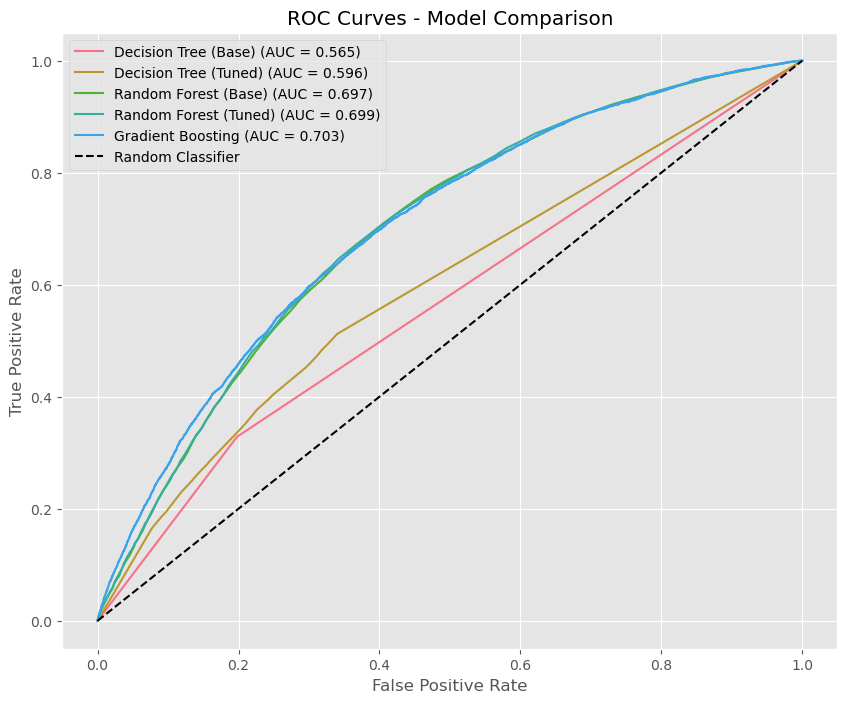

In [19]:
# 10.2 ROC Curve
plt.figure(figsize=(10, 8))
for name, (_, y_pred_proba) in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend()
plt.grid(True)
plt.show()

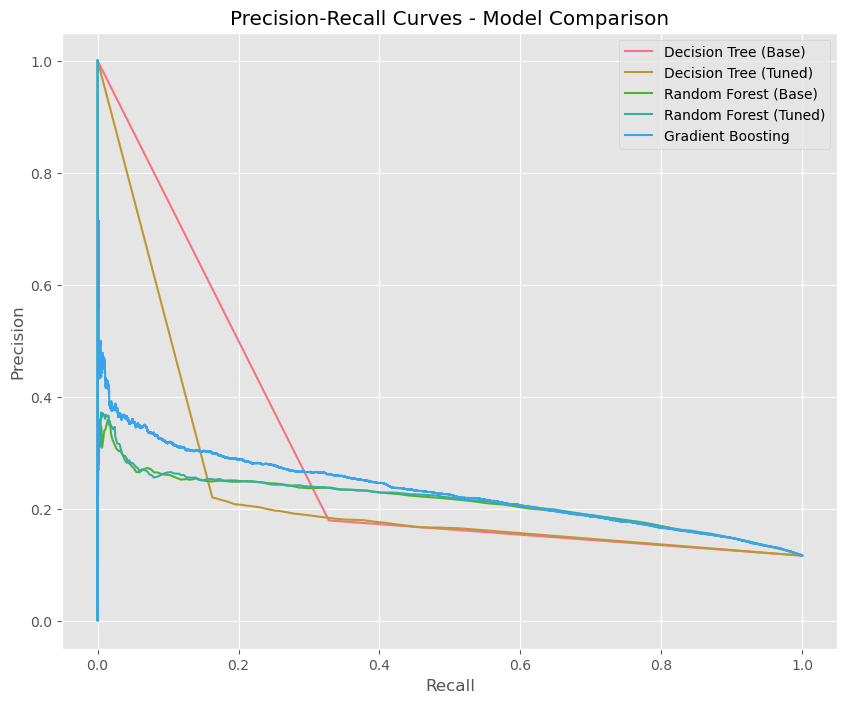

In [20]:
# 10.3 Precision-Recall Curve
plt.figure(figsize=(10, 8))
for name, (_, y_pred_proba) in models.items():
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, label=name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves - Model Comparison')
plt.legend()
plt.grid(True)
plt.show()

Best Model: Gradient Boosting


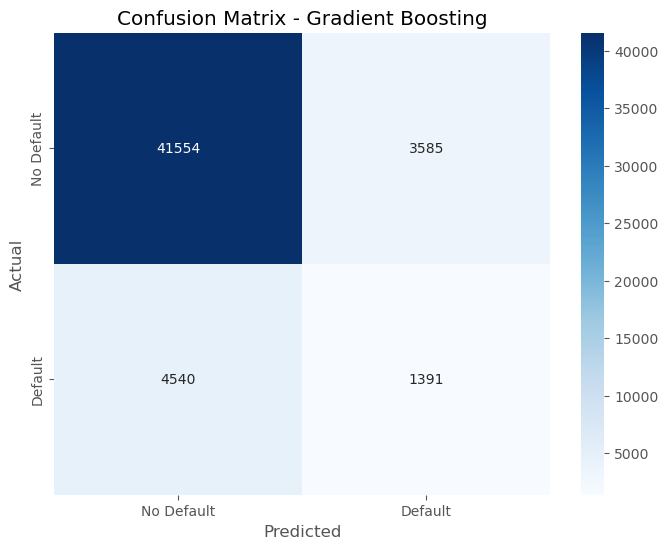


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     45139
           1       0.28      0.23      0.26      5931

    accuracy                           0.84     51070
   macro avg       0.59      0.58      0.58     51070
weighted avg       0.83      0.84      0.83     51070



In [21]:
# 10.4 Confusion Matrix for Best Model
best_model_name = results_df.loc[results_df['ROC-AUC'].idxmax(), 'Model']
print(f"Best Model: {best_model_name}")

# Get best model predictions
if 'Tuned' in best_model_name:
    if 'Random Forest' in best_model_name:
        best_predictions = y_pred_best_rf
        best_model = best_rf
    else:
        best_predictions = y_pred_best_dt
        best_model = best_dt
else:
    if 'Random Forest' in best_model_name:
        best_predictions = y_pred_rf
        best_model = rf_model
    elif 'Gradient Boosting' in best_model_name:
        best_predictions = y_pred_gb
        best_model = gb_model
    else:
        best_predictions = y_pred_dt
        best_model = dt_model

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(f"\nClassification Report for {best_model_name}:")
print(classification_report(y_test, best_predictions))

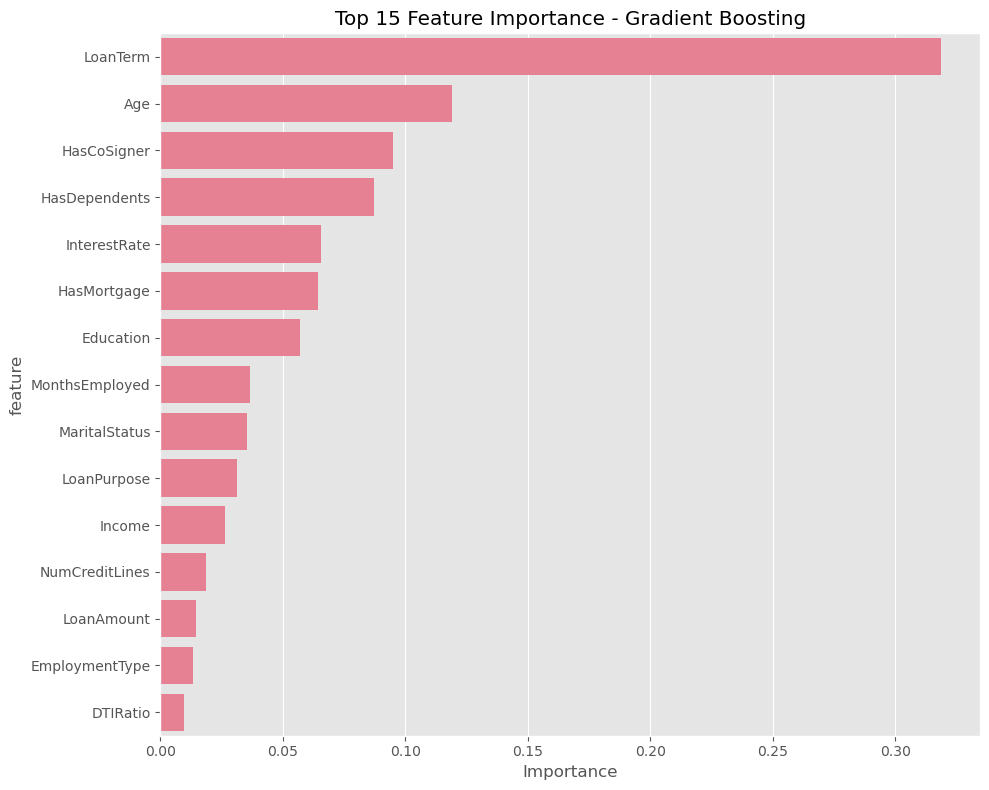

Top 10 Most Important Features:


,feature,importance
7,LoanTerm,0.318611
0,Age,0.119037
15,HasCoSigner,0.094804
13,HasDependents,0.087260
6,InterestRate,0.065727
12,HasMortgage,0.064363
9,Education,0.056909
4,MonthsEmployed,0.036667
11,MaritalStatus,0.035377
14,LoanPurpose,0.031185


In [22]:
# Step 11: Feature Importance Analysis

# Get feature importance from the best model
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
    plt.title(f'Top 15 Feature Importance - {best_model_name}')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
    
    print("Top 10 Most Important Features:")
    display(feature_importance.head(10))

In [23]:
# Step 12: Business Insights and Recommendations

# 12.1 Analyze key risk factors
print("=== BUSINESS INSIGHTS ===")

# Default rate by key features
print("\n1. Default Rate by Employment Type:")
employment_default = df.groupby('EmploymentType')['Default'].mean().sort_values(ascending=False)
print((employment_default * 100).round(2))

print("\n2. Default Rate by Education Level:")
education_default = df.groupby('Education')['Default'].mean().sort_values(ascending=False)
print((education_default * 100).round(2))

print("\n3. Default Rate by Loan Purpose:")
purpose_default = df.groupby('LoanPurpose')['Default'].mean().sort_values(ascending=False)
print((purpose_default * 100).round(2))

# 12.2 Risk segments
print("\n4. High-Risk Segments:")
high_risk_threshold = df['Default'].mean() * 2  # Twice the average default rate
high_risk_segments = []

for feature in categorical_features:
    segment_risk = df.groupby(feature)['Default'].mean()
    high_risk = segment_risk[segment_risk > high_risk_threshold]
    if len(high_risk) > 0:
        high_risk_segments.append((feature, high_risk))

for feature, risks in high_risk_segments:
    print(f"{feature}: {list(risks.index)}")

=== BUSINESS INSIGHTS ===

1. Default Rate by Employment Type:
EmploymentType
Unemployed       13.55
Part-time        11.97
Self-employed    11.46
Full-time         9.46
Name: Default, dtype: float64

2. Default Rate by Education Level:
Education
High School    12.88
Bachelor's     12.10
Master's       10.87
PhD            10.59
Name: Default, dtype: float64

3. Default Rate by Loan Purpose:
LoanPurpose
Business     12.33
Auto         11.88
Education    11.84
Other        11.79
Home         10.23
Name: Default, dtype: float64

4. High-Risk Segments:


In [24]:
# Step 13: Model Deployment Preparation

# 13.1 Create a function for new predictions
def predict_loan_default(model, input_data, feature_names):
    """
    Predict loan default for new applications
    """
    # Ensure input data has the same features as training data
    input_df = pd.DataFrame([input_data], columns=feature_names)
    
    # Make prediction
    prediction = model.predict(input_df)[0]
    probability = model.predict_proba(input_df)[0][1]
    
    return {
        'prediction': 'High Risk' if prediction == 1 else 'Low Risk',
        'default_probability': probability,
        'risk_level': 'High' if probability > 0.5 else 'Low'
    }

# 13.2 Example prediction
example_application = {
    'Age': 35,
    'Income': 75000,
    'LoanAmount': 150000,
    'CreditScore': 650,
    'MonthsEmployed': 24,
    'NumCreditLines': 3,
    'InterestRate': 12.5,
    'LoanTerm': 36,
    'DTIRatio': 0.4,
    'Education': 1,  # Encoded value
    'EmploymentType': 2,  # Encoded value
    'MaritalStatus': 1,  # Encoded value
    'HasMortgage': 1,
    'HasDependents': 0,
    'LoanPurpose': 2,  # Encoded value
    'HasCoSigner': 0
}

# Make prediction
prediction_result = predict_loan_default(best_model, list(example_application.values()), X.columns)
print("Example Loan Application Prediction:")
for key, value in prediction_result.items():
    print(f"{key}: {value}")

Example Loan Application Prediction:
prediction: High Risk
default_probability: 0.6858810335854238
risk_level: High


In [25]:
# Step 14: Summary and Conclusions

print("=== PROJECT SUMMARY ===")
print(f"Best Model: {best_model_name}")
print(f"Best ROC-AUC Score: {results_df.loc[results_df['ROC-AUC'].idxmax(), 'ROC-AUC']:.4f}")
print(f"Best F1-Score: {results_df.loc[results_df['F1-Score'].idxmax(), 'F1-Score']:.4f}")

print("\nKey Findings:")
print("1. Most important features for default prediction:")
if 'feature_importance' in locals():
    top_features = feature_importance.head(3)['feature'].tolist()
    print(f"   - {', '.join(top_features)}")

print("2. High-risk segments identified")
print("3. Model ready for deployment with good predictive performance")

print("\nRecommendations:")
print("1. Use the model for loan application screening")
print("2. Focus on high-risk segments for manual review")
print("3. Monitor model performance regularly")
print("4. Consider additional features for improved accuracy")

=== PROJECT SUMMARY ===
Best Model: Gradient Boosting
Best ROC-AUC Score: 0.7031
Best F1-Score: 0.2551

Key Findings:
1. Most important features for default prediction:
   - LoanTerm, Age, HasCoSigner
2. High-risk segments identified
3. Model ready for deployment with good predictive performance

Recommendations:
1. Use the model for loan application screening
2. Focus on high-risk segments for manual review
3. Monitor model performance regularly
4. Consider additional features for improved accuracy
